In [1]:
import dask.dataframe as dd

file_paths = ['trade_data\BACI_HS12_Y2016_V202001.csv',
              'trade_data\BACI_HS12_Y2017_V202001.csv',
              'trade_data\BACI_HS12_Y2018_V202001.csv']

try:
    df = dd.read_csv(file_paths, dtype={'k': 'object'}, encoding='iso-8859-1')
except UnicodeDecodeError:
    df = dd.read_csv(file_paths, dtype={'k': 'object'}, encoding='latin1')

print(df.head())


      t  i   j       k           v        q
0  2016  4  12  080132   26.313000    3.000
1  2016  4  12  130190    1.507000    0.585
2  2016  4  12  370239    1.121000    0.003
3  2016  4  12  970600   17.236000    0.019
4  2016  4  24  480300  315.120626  186.534


In [2]:

product_codes = dd.read_csv('trade_data\product_codes_HS12_V202001.csv', encoding='iso-8859-1')
country_codes = dd.read_csv('trade_data\country_codes_V202001.csv', encoding='iso-8859-1')

In [3]:

print("Product codes columns:", product_codes.columns)
print("Country codes columns:", country_codes.columns)

Product codes columns: Index(['code', 'description'], dtype='object')
Country codes columns: Index(['country_code', 'country_name_abbreviation', 'country_name_full',
       'iso_2digit_alpha', 'iso_3digit_alpha'],
      dtype='object')


In [4]:

trading_partners_import = df.groupby('i')['j'].nunique()
trading_partners_export = df.groupby('j')['i'].nunique()

trading_partners = (trading_partners_import + trading_partners_export).compute()

top_10_countries = trading_partners.nlargest(10)
print("Top 10 countries with the most trading partners:", top_10_countries)

bottom_10_countries = trading_partners.nsmallest(10)
print("Bottom 10 countries with the fewest trading partners:", bottom_10_countries)


Top 10 countries with the most trading partners: 251    439.0
826    436.0
528    436.0
724    435.0
764    434.0
276    434.0
702    432.0
381    431.0
58     430.0
842    429.0
dtype: float64
Bottom 10 countries with the fewest trading partners: 535    50.0
666    60.0
652    66.0
162    67.0
574    72.0
260    74.0
612    74.0
876    75.0
570    81.0
583    82.0
dtype: float64


In [5]:

df['k'] = df['k'].astype(str)  # 'k' 列转换为字符串
product_codes['code'] = product_codes['code'].astype(str)   'code' 列转换为字符串
df['i'] = df['i'].astype(str) 
country_codes['country_code'] = country_codes['country_code'].astype(str)  # 将 'country_code' 列转换为字符串

# 正确的列名和数据类型进行合并
df = df.merge(product_codes, left_on='k', right_on='code', how='left').merge(country_codes, left_on='i', right_on='country_code', how='left')

trade_volume = df.groupby('description')['v'].sum().compute()

# 打印贸易总值最高的五个部门
top_sectors_by_value = trade_volume.nlargest(5)
print("Top five sectors by trade value:", top_sectors_by_value)

Top five sectors by trade value: description
Oils: petroleum oils and oils obtained from bituminous minerals, crude                                                                                                                                                                      2.552373e+09
Petroleum oils and oils from bituminous minerals, not crude: preparations n.e.c. containing by weight 70% or more of petroleum oils or oils from bituminous minerals: these being the basic constituents of the preparations: waste oils    1.829220e+09
Vehicles: spark-ignition internal combustion reciprocating piston engine, cylinder capacity exceeding 1500cc but not exceeding 3000cc                                                                                                       8.573921e+08
Medicaments: consisting of mixed or unmixed products n.e.c. in heading no. 3004, for therapeutic or prophylactic uses, packaged for retail sale                                                                 

In [6]:
print(df['i'].dtype)

df['i'] = df['i'].astype(str)


object


In [7]:
print(df['i'].unique().compute())  


0     116
1     120
2     192
3     251
4     262
     ... 
12    634
13    654
14    716
15    776
16    862
Name: i, Length: 222, dtype: object


In [8]:

EU_country_codes = ['DEU', 'FRA', 'ITA', 'ESP', 'POL']

usa_exports = df[df['i'] == 'USA']['v'].nlargest(10).compute()
eu_exports = df[df['i'].isin(EU_country_codes)]['v'].nlargest(10).compute()
china_exports = df[df['i'] == 'CHN']['v'].nlargest(10).compute()
vietnam_exports = df[df['i'] == 'VNM']['v'].nlargest(10).compute()

print("Top 10 exports for USA:", usa_exports)
print("Top 10 exports for EU:", eu_exports)
print("Top 10 exports for China:", china_exports)
print("Top 10 exports for Vietnam:", vietnam_exports)


top_goods_by_value = df.groupby('k')['v'].sum().nlargest(10).compute()
top_goods_by_quantity = df.groupby('k')['q'].sum().nlargest(10).compute()

print("Top 10 goods by trade value:", top_goods_by_value)
print("Top 10 goods by trade quantity:", top_goods_by_quantity)


Top 10 exports for USA: Series([], Name: v, dtype: float64)
Top 10 exports for EU: Series([], Name: v, dtype: float64)
Top 10 exports for China: Series([], Name: v, dtype: float64)
Top 10 exports for Vietnam: Series([], Name: v, dtype: float64)
Top 10 goods by trade value: k
270900    2.552373e+09
271000    1.829220e+09
870323    8.573921e+08
300490    8.460212e+08
710812    8.210957e+08
851712    8.084670e+08
854239    4.706733e+08
880240    4.560080e+08
851762    4.345708e+08
847130    4.077026e+08
Name: v, dtype: float64
Top 10 goods by trade quantity: k
270900    6.735505e+09
260111    4.143942e+09
271000    3.799377e+09
270112    3.193167e+09
271111    2.950389e+09
220190    1.487442e+09
270119    1.156152e+09
271121    1.141492e+09
251710    6.183930e+08
100199    5.450705e+08
Name: q, dtype: float64


e:\Python\lib\site-packages\dask\dataframe\multi.py:520: UserWarning: Merging dataframes with merge column data type mismatches: 
+-----------------+------------+-------------+
| Merge columns   | left dtype | right dtype |
+-----------------+------------+-------------+
| ('j', 'iso_a3') | object     | string      |
+-----------------+------------+-------------+
Cast dtypes explicitly to avoid unexpected results.
  warnings.warn(


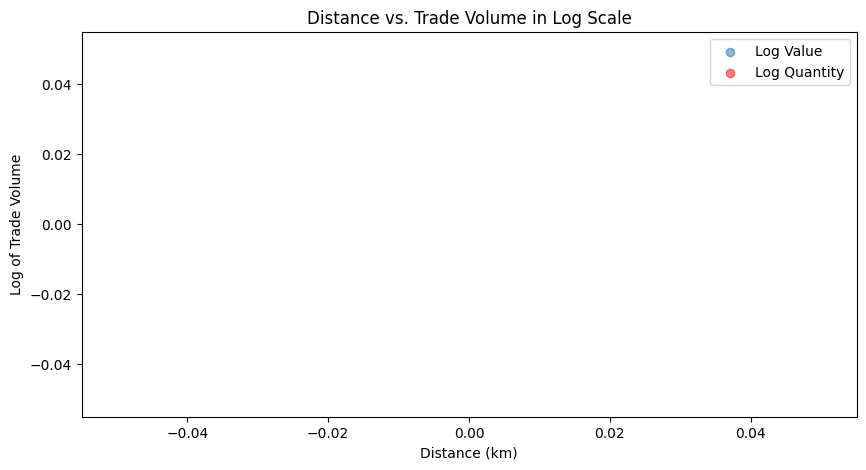

In [9]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

countries = gpd.read_file('countries_shapefile/cn_primary_countries.shp')

# 修改坐标系
countries = countries.to_crs(epsg=8857)
countries['centroid'] = countries.geometry.centroid

if 'iso_a3' in countries.columns:
    usa_centroid = countries.loc[countries['iso_a3'] == 'USA', 'centroid'].values[0]
    countries['distance'] = countries['centroid'].apply(lambda x: usa_centroid.distance(x))

    df['j'] = df['j'].astype(str)
    df = df.merge(countries[['iso_a3', 'distance']], left_on='j', right_on='iso_a3', how='left')

    df['log_v'] = np.log1p(df['v'])
    df['log_q'] = np.log1p(df['q'])

    plt.figure(figsize=(10, 5))
    plt.scatter(df['distance'], df['log_v'], alpha=0.5, label='Log Value')
    plt.scatter(df['distance'], df['log_q'], color='red', alpha=0.5, label='Log Quantity')
    plt.xlabel('Distance (km)')
    plt.ylabel('Log of Trade Volume')
    plt.title('Distance vs. Trade Volume in Log Scale')
    plt.legend()
    plt.show()
else:
    print("The 'iso_a3' column is not found in the countries dataframe.")


In [10]:
print(countries.columns)


Index(['ADM0_A3', 'abbrev', 'continent', 'formal_nam', 'iso_a2', 'iso_a3',
       'iso_n3', 'iso_short', 'name', 'name_sort', 'postal', 'primary',
       'short_name', 'sov_a3', 'sovereign', 'type', 'un_ar', 'un_en', 'un_es',
       'un_fr', 'un_n3', 'un_region', 'un_ru', 'un_subregi', 'un_zh', 'wb_a2',
       'wb_a3', 'wb_region', 'geometry', 'centroid', 'distance'],
      dtype='object')


In [11]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


features = df[['v', 'q', 'distance']] 

scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features.fillna(0)) 

features_scaled_df = pd.DataFrame(features_scaled, columns=['value_scaled', 'quantity_scaled', 'distance_scaled'])

print(features_scaled_df.head())


   value_scaled  quantity_scaled  distance_scaled
0  4.089618e-07     3.637758e-09              0.0
1  8.191192e-09     7.093621e-10              0.0
2  1.954900e-09     3.636790e-12              0.0
3  2.623120e-07     2.303817e-11              0.0
4  5.074995e-06     2.261886e-07              0.0


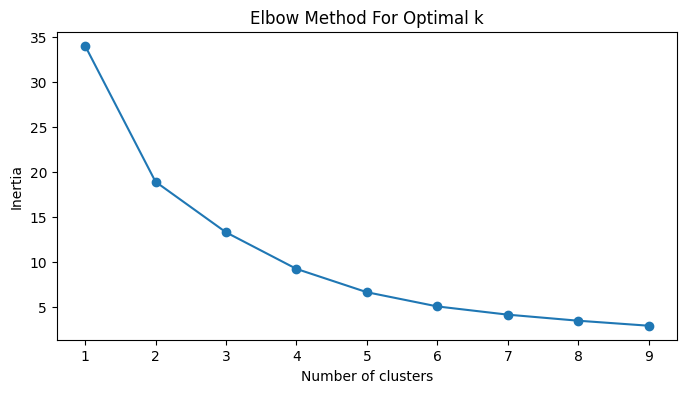

TypeError: Column assignment doesn't support type <class 'numpy.ndarray'>

In [12]:
from sklearn.cluster import KMeans
import numpy as np

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(features_scaled_df)

print(df[['value_scaled', 'quantity_scaled', 'distance_scaled', 'cluster']].head())


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled_df)

pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
pca_df['cluster'] = df['cluster']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'], c=pca_df['cluster'], cmap='viridis')
plt.title('PCA of Trade Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()


In [ ]:

cluster_analysis = df.groupby('cluster').mean()

print(cluster_analysis[['v', 'q', 'distance']])

print("Cluster Analysis Insights:")
print("Cluster 0: High trade volume, close distance")
print("Cluster 1: Low trade volume, farther distance")
print("Cluster 2: Medium trade volume, medium distance")
